In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [10]:
iris = load_iris(as_frame=True)
X = iris.data.values
y = iris.target.values

In [11]:
per = Perceptron()
per.fit(X, y)

Perceptron()

In [20]:
per.score(X, y)

0.48

In [12]:
per.predict([[2, 0.5, 3.1, 4.8]])

array([2])

In [14]:
from sklearn.neural_network import MLPRegressor

In [15]:
from sklearn.datasets import fetch_california_housing

In [67]:
df = fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [68]:
df.data.shape

(20640, 8)

In [69]:
df.target

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.metrics import mean_absolute_error

In [72]:
X_train_valid, X_test, y_train_valid, y_test = train_test_split(
    df.data, df.target, random_state=42)

In [73]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_valid, y_train_valid, random_state=42)

In [26]:
mlp = MLPRegressor(hidden_layer_sizes=(100,50,50))
mlp.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(100, 50, 50))

In [33]:
mean_absolute_error(y_valid, mlp.predict(X_valid))

0.7743240163654861

# Keras

## Classification

In [34]:
import tensorflow as tf

In [35]:
fmnist = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [36]:
(X_train_valid, y_train_valid), (X_test, y_test) = fmnist

In [37]:
X_train_valid.shape

(60000, 28, 28)

In [38]:
X_test.shape

(10000, 28, 28)

In [39]:
X_train, y_train = X_train_valid[:-5000], y_train_valid[:-5000]
X_valid, y_valid = X_train_valid[-5000:], y_train_valid[-5000:]

In [40]:
X_train.shape

(55000, 28, 28)

In [41]:
X_valid.shape

(5000, 28, 28)

In [44]:
X_train, X_valid, X_test = X_train/255, X_valid/255, X_test/255

In [45]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(100, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [46]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[28, 28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

In [47]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 100)               10100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 89,610
Trainable params: 89,610
Non-trainable params: 0
_________________________________________________________________


In [48]:
model.layers

In [51]:
model.layers[1].get_weights()

[array([[ 0.01847734, -0.04067848, -0.05072953, ...,  0.02881578,
          0.00967292,  0.01917183],
        [ 0.01968332, -0.05160809, -0.0573592 , ..., -0.05679315,
         -0.03072193, -0.04662447],
        [-0.00614415,  0.05321129,  0.00972392, ...,  0.04040753,
          0.06030993,  0.0489188 ],
        ...,
        [ 0.0377789 ,  0.00713017, -0.042728  , ...,  0.02392912,
         -0.06317511, -0.03666297],
        [ 0.00112548, -0.07696969, -0.01504088, ...,  0.01264291,
          0.03870952,  0.03480639],
        [-0.04837381, -0.07076061, -0.01300777, ..., -0.06546857,
         -0.00405191,  0.06028649]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [52]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [53]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [55]:
history = model.fit(X_train, y_train, epochs=10,
          validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3468 - accuracy: 0.8762 - val_loss: 0.3810 - val_accuracy: 0.8604
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3394 - accuracy: 0.8787 - val_loss: 0.3487 - val_accuracy: 0.8772
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3319 - accuracy: 0.8834 - val_loss: 0.3564 - val_accuracy: 0.8710
Epoch 4/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3256 - accuracy: 0.8822 - val_loss: 0.3465 - val_accuracy: 0.8754
Epoch 5/10
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3187 - accuracy: 0.8858 - val_loss: 0.3481 - val_accuracy: 0.8756
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3131 - accuracy: 0.8876 - val_loss: 0.3380 - val_accuracy: 0.8748
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3081 - accuracy: 0.8895 - val_loss: 0.3587 - val_accuracy:

In [56]:
history.history

{'loss': [0.34675198793411255,
  0.33944031596183777,
  0.3318951427936554,
  0.3256256878376007,
  0.31873977184295654,
  0.31307244300842285,
  0.3080655038356781,
  0.3024139702320099,
  0.29796552658081055,
  0.2937752604484558],
 'accuracy': [0.8762181997299194,
  0.8787272572517395,
  0.8834182024002075,
  0.8821636438369751,
  0.8857636451721191,
  0.8875636458396912,
  0.8894727230072021,
  0.8915272951126099,
  0.8924545645713806,
  0.8948181867599487],
 'val_loss': [0.3809970021247864,
  0.348745197057724,
  0.35644951462745667,
  0.3465385138988495,
  0.3480791747570038,
  0.3380335569381714,
  0.3587435185909271,
  0.33199378848075867,
  0.33126282691955566,
  0.33212488889694214],
 'val_accuracy': [0.8604000210762024,
  0.8772000074386597,
  0.8709999918937683,
  0.8754000067710876,
  0.8755999803543091,
  0.8748000264167786,
  0.866599977016449,
  0.8799999952316284,
  0.8794000148773193,
  0.8795999884605408]}

In [57]:
import matplotlib.pyplot as plt

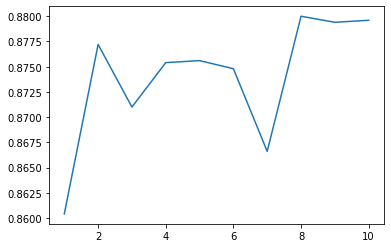

In [61]:
plt.plot(np.linspace(1, 10, 10), history.history["val_accuracy"])

In [62]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3571 - accuracy: 0.8742


[0.357112318277359, 0.8741999864578247]

In [64]:
model.predict(X_test[:3]).argmax(axis=-1)

1/1 [==============================] - 0s 37ms/step


array([9, 2, 1])

In [66]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

## Regression

In [74]:
X_train.shape

(11610, 8)

In [75]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=[8]),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

In [76]:
model.compile(loss="mse",
              optimizer="Adam",
              metrics=["mean_absolute_error"])

In [78]:
model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 438.4702 - mean_absolute_error: 5.3000 - val_loss: 5.1588 - val_mean_absolute_error: 0.9667
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.3871 - mean_absolute_error: 0.9039 - val_loss: 4.1721 - val_mean_absolute_error: 0.8758
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 1.2664 - mean_absolute_error: 0.8719 - val_loss: 3.3210 - val_mean_absolute_error: 0.8603
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1900 - mean_absolute_error: 0.8379 - val_loss: 3.6493 - val_mean_absolute_error: 1.1985
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 1.0684 - mean_absolute_error: 0.7976 - val_loss: 1.3149 - val_mean_absolute_error: 0.7126
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 1.8472 - mean_absolute_error: 0.9943 - val_loss: 0.8180 - val_mean_absolute_error: 0.6523
Epoch 7/20
363

# Functional API

In [80]:
input_data = tf.keras.layers.Input(shape=[8])
h1 =  tf.keras.layers.Dense(50, activation="relu")(input_data)
h2 = tf.keras.layers.Dense(50, activation="relu")(h1)
concat = tf.keras.layers.Concatenate()([input_data, h2])
output = tf.keras.layers.Dense(1)(concat)

In [ ]:
tf.keras.Model(inputs=[input_data], outputs=[output])

In [ ]:
model.fit((X_train1, X_train2), y_train)

# Subclass API